In [148]:
# importing required libraries

import pandas as pd,os
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [149]:
print(os.listdir())

['.ipynb_checkpoints', 'anamoly_dect.csv', 'cleaned_data', 'cleaned_data.csv', 'cleaned_data.txt', 'coconut_df.csv', 'crop analysis celan.ipynb', 'crop analysis.ipynb', 'crop_after_coconut.csv', 'Crop_clean.csv', 'crop_final.csv', 'crop_production.csv', 'Data Cleaning Guide.pdf', 'df_no_outlier.csv', 'for coconut.pbix', 'insights.txt', 'insights[1].txt', 'outline.pbix', 'prject dashboard.pbix', 'project 1.pbix', 'summery.pbix']


In [150]:
# loading dataset

crop_df=pd.read_csv('crop_production.csv')

In [151]:
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [152]:
# checking null values count from dataset

crop_df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [153]:
# we have approx 243000 rows and out of that 3730 were null (1.53%) so we decided to drop these rows for better analysis
crop_df.dropna(inplace=True) 

In [154]:
# after droping null values there is no null value in dataset
crop_df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [155]:
# checking unique type of season
crop_df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [201]:
# here we remove unwanted white spaces from season column 

crop_df['Season']=crop_df['Season'].apply(lambda x : x.strip())
crop_df['Crop']=crop_df['Crop'].apply(lambda x : x.strip())
crop_df['Crop']=crop_df['State_Name'].apply(lambda x : x.strip())

In [157]:
# after removing white spaces

crop_df.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [158]:
# checking the values counts of each season

crop_df['Season'].value_counts()

Kharif        94283
Rabi          66160
Whole Year    56127
Summer        14811
Winter         6050
Autumn         4930
Name: Season, dtype: int64

In [159]:
'''since there are Three types of crop out of which two are mainly seasonal Rabi and Kharif and one is for whole year but
 5 crops season were present in our datset.we got to know that summer and Autumn synonyms of Kharif and winter is synonyms of
 of Rabi so we decided to replace with their original name which is Kharif Rabi'''

crop_df['Season']=crop_df['Season'].apply(lambda x : x.replace('Autumn','Kharif'))
crop_df['Season']=crop_df['Season'].apply(lambda x : x.replace('Summer','Kharif'))
crop_df['Season']=crop_df['Season'].apply(lambda x : x.replace('Winter','Rabi'))

In [160]:
#Checking values counts of season after replacing wiyh their original name

crop_df['Season'].value_counts()

Kharif        114024
Rabi           72210
Whole Year     56127
Name: Season, dtype: int64

In [161]:
# we have observed that many values of producation were 0 since it is represntating producation of whole district
# so we decided drop all rows whose producation values are zero

crop_df.drop(crop_df[crop_df['Production']==0].index,inplace=True)

print(f'After removing the row which has 0 Production : {crop_df.shape[0]}')

After removing the row which has 0 Production : 238838


In [162]:
# checking unique crops names 
# we observed that many crops were presenyed with their syononame so we decided all syononyms of crops to replace with their popular name
# like paddy and rice are same so we replace paddy with Rice
# also number of rows of crops sub-category were very less

crop_df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Beans & Mutter(Vegetable)', 'Bhindi',
       'Brinjal', 'Citrus Fruit', 'Grapes', 'Mango', 'Orange',
       'Other Fresh Fruits', 'Papaya', 'Pome Fruit', 'Tomato', 'Soyabean',
       'Mesta', 'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota',
       'Cabbage', 'Rapeseed &Mustard', 'Niger seed', 'Varagu', 'Garlic',
       'Ginger', 'Oilseeds total', 'Pulses total', 'Jute',
       'Peas & beans (Pulses)', 'Bla

In [163]:
# we have replaced  kapas to cotton etc.

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Kapas','Cotton(lint)')
                                      .replace('Cotton(lint)','Cotton'))

crop_df.replace('Jute & mesta','Jute',inplace=True)
crop_df.replace('Mesta','Jute',inplace=True)

In [164]:
# we have replace sub-category of pulses with pulse

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Other Kharif pulses','pulses')
                                    .replace('Other  Rabi pulses','pulses')
                                    .replace('Peas & beans (Pulses)','pulses')
                                    .replace('Pulses total','pulses')
                                    .replace('other misc. pulses','pulses')
                                    .replace('Moong(Green Gram)','pulses')
                                    .replace('Urad','pulses')
                                    .replace('Arhar/Tur','pulses')
                                    .replace('Bean','pulses')
                                    .replace('Ricebean (nagadal)','pulses')
                                    .replace('Lentil','pulses')
                                    .replace('Masoor','pulses')
                                    .replace('Khesari','pulses')
                                    .replace('Horse-gram','pulses')
                                    .replace('Rajmash Kholar','pulses'))

In [165]:
#we have corrected spelling mistake

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Atcanut (Raw)','Arecanut')
                                    .replace('Arcanut (Processed)','Arecanut')
                                    .replace('Arecanut','Arecanut'))

In [166]:
# we have replaced varienty of spices with othe spices

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Black pepper','Other Spices')
                                    .replace('Cardamom','Other Spices')
                                    .replace('Perilla','Other Spices'))

In [167]:
#since number of rows for every fruits category were very less so we decided to megre all to fruits

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Papaya','Fruits')
                                    .replace('Mango','Fruits')
                                     .replace('Orange','Fruits')
                                     .replace('Other Fresh Fruits','Fruits')
                                     .replace('Pineapple','Fruits')
                                     .replace('Citrus Fruit','Fruits')
                                     .replace('Pome Fruit','Fruits')
                                     .replace('Pome Granet','Fruits')
                                     .replace('Grapes','Fruits')
                                     .replace('Jack Fruit','Fruits')
                                     .replace('Sapota','Fruits')
                                     .replace('Lemon','Fruits'))


In [168]:
# we have replace sub-category with their main-category 

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Ginger','Dry ginger'))

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Turnip','Onion'))

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('Cashewnut Raw','Cashewnut')
                                      .replace('Cashewnut Processed','Cashewnut'))

In [169]:
# we have replace sub-category of gram with their main-category 

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('black gram','gram')
                                     .replace('Moth','gram')
                                     .replace('Blackgram','gram'))

In [170]:
# we have replace other Oilseeds total to  other oilseeds

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('Oilseeds total' ,'other oilseeds')
                                      .replace('Niger seed' ,'other oilseeds'))

In [171]:
# we have replace sub-category of milltes with their main-category 

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('Other Cereals & Millets' ,'Bajra')
                                      .replace('Samai' ,'Bajra')
                                      .replace('Small millets' ,'Bajra')
                                      .replace('Ragi','Bajra')
                                      .replace('Varagu','Bajra')
                                      .replace('Jobster','Bajra'))

In [172]:
# we have replace sub-category of Vegetables with their main-category 

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                     .replace('Coriander' ,'Other Vegetables')
                                     .replace('pulsess & Mutter(Vegetable)' ,'Other Vegetables')
                                     .replace('Bhindi' ,'Other Vegetables')
                                     .replace('Tomato','Other Vegetables')
                                     .replace('Cowpea(Lobia)','Other Vegetables')
                                     .replace('Cabbage','Other Vegetables')
                                     .replace('Carrot','Other Vegetables')
                                     .replace('Drum Stick','Other Vegetables')
                                     .replace('Redish','Other Vegetables')
                                     .replace('Cauliflower','Other Vegetables')
                                     .replace('Colocosia','Other Vegetables')
                                     .replace('Brinjal','Other Vegetables')
                                     .replace('Bottle Gourd','Other Vegetables')
                                     .replace('Bitter Gourd','Other Vegetables'))

In [173]:
#we have replace sub-category with their main-category

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Niger seed','Sesamum'))
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Korra','Total foodgrain'))
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Paddy','Rice'))

In [174]:
#we have observed some cropes rows are very very less so it wont make any sense to visualization so we decided to drop those rows

crop_df.drop(crop_df[crop_df['Crop']=='Tea'].index,inplace=True)
crop_df.drop(crop_df[crop_df['Crop']=='Coffee'].index,inplace=True)
crop_df.drop(crop_df[crop_df['Crop']=='Rubber'].index,inplace=True)
crop_df.drop(crop_df[crop_df['Crop']=='Cond-spcs other'].index,inplace=True)

In [175]:
# checking unique crops types after replacement

crop_df.Crop.unique()

array(['Arecanut', 'pulses', 'Rice', 'Banana', 'Cashewnut', 'Coconut',
       'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Other Spices', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Groundnut', 'Sunflower', 'Bajra', 'Castor seed',
       'Cotton', 'Jowar', 'Total foodgrain', 'Tobacco', 'Gram', 'Wheat',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'Other Vegetables',
       'Potato', 'Fruits', 'Soyabean', 'Jute', 'Rapeseed &Mustard',
       'Garlic', 'gram', 'Barley', 'Sannhamp', 'Guar seed'], dtype=object)

In [176]:
# saving cleaned data file

crop_df.to_csv('Crop_clean.csv')

In [177]:
crop_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0


In [178]:
crop_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0


In [179]:
# to find outlier we created new column Producation_area_factor

crop_df['Producation_area_factor']= crop_df['Production'] / crop_df['Area']

In [180]:
# checking newly created column 

crop_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Producation_area_factor
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0,2.141848


In [181]:
Q1 = crop_df['Area'].quantile(0.25)
Q3 = crop_df['Area'].quantile(0.75)
Q1, Q3

(91.0, 4700.0)

In [182]:
IQR = Q3 - Q1   

In [183]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-6822.5, 11613.5)

In [184]:
area_outlier = crop_df[(crop_df['Area'] < lower_limit) | (crop_df['Area'] > upper_limit)]

In [186]:
area_outlier['Crop'].value_counts()

Rice                 9138
Wheat                5080
pulses               4668
Maize                2514
Bajra                2312
Gram                 1974
Jowar                1902
Cotton               1474
Rapeseed &Mustard    1469
Groundnut            1449
Sugarcane            1321
Soyabean             1069
Sesamum               574
Coconut               556
Sunflower             498
Potato                387
Jute                  298
Guar seed             246
Castor seed           241
other oilseeds        238
Dry chillies          173
Arecanut              169
Cashewnut             163
Barley                154
Total foodgrain       153
Tobacco               144
Safflower             137
Other Vegetables      111
gram                  103
Linseed                99
Tapioca                93
Onion                  83
Other Spices           71
Fruits                 63
Banana                 33
Turmeric               30
Garlic                 11
Dry ginger              6
Name: Crop, 

In [187]:
# Since india very big country for better vislization we will divide states name in four zone (East , West , North ,South) 
# details of these zones are mentioned below

In [202]:
West_India= ['Maharashtra','Goa','Gujarat','Dadra and Nagar Haveli']
East_India= ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikkim','Tripura','West Bengal','Bihar','Odisha','Jharkhand' ]
North_India=['Jammu and Kashmir ','Himachal Pradesh','Punjab','Uttarakhand','Haryana','Rajasthan','Uttar Pradesh','Chandigarh','Madhya Pradesh','Chhattisgarh']   # Delhi
South_India = ['Andhra Pradesh','Karnataka','Kerala','Tamil Nadu','Telangana','Puducherry']

In [203]:
# creating a list for zones
zone = []

for df in crop_df['State_Name']:
    if df in West_India:
         zone.append('West India')
    elif df in East_India:
         zone.append('EastIndia')
    elif df in North_India:
         zone.append('North India')
    elif df in South_India: 
         zone.append('South India')
    else:
         zone.append('Union Territory')

In [204]:
# creatinh new column 
crop_df['zone'] = zone

In [205]:
crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Producation_area_factor,zone
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,1254.0,2000.0,1.594896,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,2.0,1.0,0.500000,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,102.0,321.0,3.147059,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,176.0,641.0,3.642045,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,720.0,165.0,0.229167,Union Territory


In [192]:
crop_df['zone'].value_counts()

North India        92752
EastIndia          71482
South India        47554
West India         21229
Union Territory     5706
Name: zone, dtype: int64

In [193]:
# checking value counts of year in dataset

crop_df['Crop_Year'].value_counts()

2003    15541
2002    15060
2007    14261
2008    14230
2006    13976
2004    13834
2010    13793
2011    13791
2009    13767
2005    13519
2013    13474
2000    13393
2012    13183
2001    13107
1999    12258
1998    11262
2014    10814
1997     8899
2015      561
Name: Crop_Year, dtype: int64

In [194]:
# sinces the number of rows for year 2015 is very less so it will not give correct visualization for year 2015 
# so we decided to remove it from dataset

crop_df.drop(crop_df[crop_df['Crop_Year'] == 2015].index,inplace=True)

In [195]:
val=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

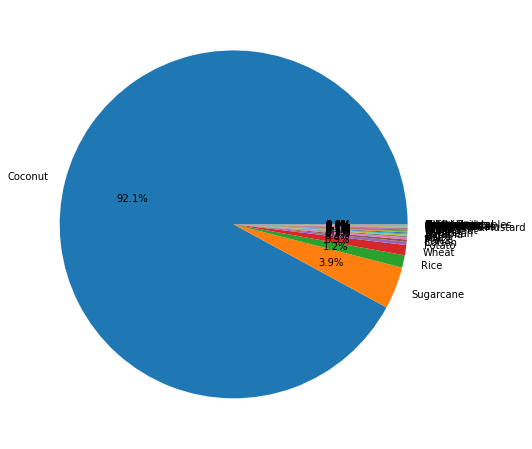

In [196]:
# we plotted pie chart of Production of different crops to check the outliers in crops
plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

In [197]:
# we have observed that Production of coconut is more than 92% of total Production so we not able to visualize our dataset
# so we have decided to visualize coconut seprately

coconut_df = crop_df[crop_df['Crop'] == 'Coconut']

coconut_df.to_csv('coconut_df.csv')

crop_df.drop(crop_df[crop_df['Crop']=='Coconut'].index,inplace=True)

In [198]:
# we plotted pie chart between total Production and different types of crops after removing outlier 

val=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

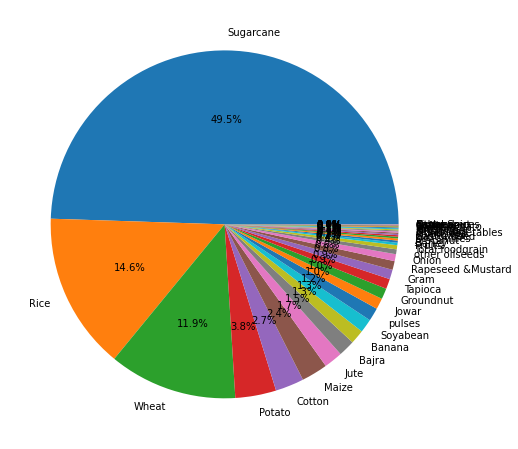

In [199]:
# we have observed that now our dataset is balance

plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

In [200]:
crop_df.to_csv('crop_final.csv')

# Conclusion 

In [121]:
# Since we have found out that number of outliers are almost approx 20% and 46000k in numbers so we can not remove these outliers
# to avoide loss of information and producation also depends types soil and area,availability of water to farmer
# so we dont have much information about these other factors so we cant not remove outliers on basis of Producation_area_factor  
# Producation_area_factor can not be same for all crops sinces this factors is hihh for coconut and very less for total_foodgrain
# so we cant not compare both on one scale
# we have observed that Production of coconut is more than 92% of total Production so we not able to visualize our dataset
# so we have decided to consider coconut as an outlier and we have removed it from dataset